1. Построение классификатора, отвечающего на вопрос 'является ли покемон легендарным?'

In [57]:
import pandas as pd
import numpy as np
pokemon = pd.read_csv("pokemon.csv") #назвали датасет, открыв его под именем "pokemon"
pokemon.shape #попросили сказать размер

(801, 41)

In [58]:
pokemon = pd.read_csv("pokemon.csv")
pokemon.head(4) #посмотрим первые 4 строки
pokemon.dropna(inplace=True)

видуализируем количество столбцов, которое имеет каждый элемент из столбца "имя" - поняли, что каждый покемон репрезентативен - то есть по почти каждому есть вся информация.

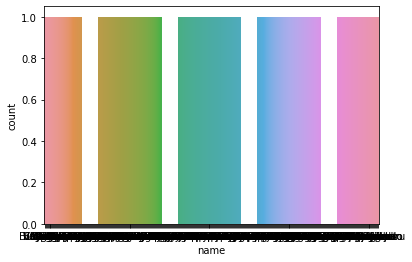

In [59]:
import seaborn as sns
ax = sns.countplot(x='name', data=pokemon)

даем тип машинного обучения, даем инструмент по splitting (рандомное разделение на тренировочный и тестовый набор) и accuracy (измерение резульативности обучения сначала по тренировочному набору параметров)

In [60]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

*random_state показывает модель, определенный метод рандомной выборки. train_size - распределение дата-сета по train и test

Теперь с помощью библиотеки LabelEncoder заменим текстовые параметры на уникальные числа

In [61]:
from sklearn.preprocessing import LabelEncoder 
le1 = LabelEncoder()
le1.fit (pokemon.type1)
pokemon['type1_le'] = le1.transform(pokemon.type1)
pokemon

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,type1_le
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,...,1,65,65,45,grass,poison,6.9,1,0,9
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,...,2,80,80,60,grass,poison,13.0,1,0,9
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,...,3,122,120,80,grass,poison,100.0,1,0,9
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.50,0.5,1.0,1.0,...,6,159,115,100,fire,flying,90.5,1,0,6
11,"['Compoundeyes', 'Tinted Lens']",0.50,1.0,1.0,2.0,1.0,0.25,2.0,2.0,1.0,...,12,90,80,70,bug,flying,32.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,['Disguise'],0.25,1.0,0.0,1.0,1.0,0.00,1.0,1.0,2.0,...,778,50,105,96,ghost,fairy,0.7,7,0,8
778,"['Dazzling', 'Strong Jaw', 'Wonder Skin ']",2.00,2.0,1.0,2.0,1.0,0.50,0.5,1.0,2.0,...,779,70,70,92,water,psychic,19.0,7,0,17
779,"['Berserk', 'Sap Sipper', 'Cloud Nine']",1.00,1.0,2.0,0.5,2.0,2.00,0.5,1.0,0.0,...,780,135,91,36,normal,dragon,185.0,7,0,12
782,"['Bulletproof', 'Soundproof', 'Overcoat']",0.50,0.5,2.0,0.5,4.0,1.00,0.5,2.0,1.0,...,783,65,70,65,dragon,fighting,47.0,7,0,2


In [64]:
le2 = LabelEncoder()
le2.fit (pokemon.abilities)
pokemon['abilities_le'] = le2.transform(pokemon.abilities)
pokemon

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,type1_le,abilities_le,classfication_le
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,...,65,45,grass,poison,6.9,1,0,9,119,196
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,...,80,60,grass,poison,13.0,1,0,9,119,196
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,...,120,80,grass,poison,100.0,1,0,9,119,196
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.50,0.5,1.0,1.0,...,115,100,fire,flying,90.5,1,0,6,14,89
11,"['Compoundeyes', 'Tinted Lens']",0.50,1.0,1.0,2.0,1.0,0.25,2.0,2.0,1.0,...,80,70,bug,flying,32.0,1,0,0,31,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,['Disguise'],0.25,1.0,0.0,1.0,1.0,0.00,1.0,1.0,2.0,...,105,96,ghost,fairy,0.7,7,0,8,43,68
778,"['Dazzling', 'Strong Jaw', 'Wonder Skin ']",2.00,2.0,1.0,2.0,1.0,0.50,0.5,1.0,2.0,...,70,92,water,psychic,19.0,7,0,17,40,101
779,"['Berserk', 'Sap Sipper', 'Cloud Nine']",1.00,1.0,2.0,0.5,2.0,2.00,0.5,1.0,0.0,...,91,36,normal,dragon,185.0,7,0,12,6,162
782,"['Bulletproof', 'Soundproof', 'Overcoat']",0.50,0.5,2.0,0.5,4.0,1.00,0.5,2.0,1.0,...,70,65,dragon,fighting,47.0,7,0,2,17,187


In [65]:
le3 = LabelEncoder()
le3.fit (pokemon.classfication)
pokemon['classfication_le'] = le3.transform(pokemon.classfication)
pokemon

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,type1_le,abilities_le,classfication_le
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,...,65,45,grass,poison,6.9,1,0,9,119,196
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,...,80,60,grass,poison,13.0,1,0,9,119,196
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,...,120,80,grass,poison,100.0,1,0,9,119,196
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.50,0.5,1.0,1.0,...,115,100,fire,flying,90.5,1,0,6,14,89
11,"['Compoundeyes', 'Tinted Lens']",0.50,1.0,1.0,2.0,1.0,0.25,2.0,2.0,1.0,...,80,70,bug,flying,32.0,1,0,0,31,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,['Disguise'],0.25,1.0,0.0,1.0,1.0,0.00,1.0,1.0,2.0,...,105,96,ghost,fairy,0.7,7,0,8,43,68
778,"['Dazzling', 'Strong Jaw', 'Wonder Skin ']",2.00,2.0,1.0,2.0,1.0,0.50,0.5,1.0,2.0,...,70,92,water,psychic,19.0,7,0,17,40,101
779,"['Berserk', 'Sap Sipper', 'Cloud Nine']",1.00,1.0,2.0,0.5,2.0,2.00,0.5,1.0,0.0,...,91,36,normal,dragon,185.0,7,0,12,6,162
782,"['Bulletproof', 'Soundproof', 'Overcoat']",0.50,0.5,2.0,0.5,4.0,1.00,0.5,2.0,1.0,...,70,65,dragon,fighting,47.0,7,0,2,17,187


Выбросим из дата-сета колонку с уникальными именами и колонку "type2", потому что не у каждого покемона есть по ней значение. Ну и, конечно, текстовые столбцы, трансформированный аналог которых мы сделали.

In [66]:
pokemon.drop(['type2', 'japanese_name', 'name', 'abilities', 'classfication', 'type1'], axis=1 )

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,type1_le,abilities_le,classfication_le
0,1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,0.25,...,1,65,65,45,6.9,1,0,9,119,196
1,1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,0.25,...,2,80,80,60,13.0,1,0,9,119,196
2,1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,0.25,...,3,122,120,80,100.0,1,0,9,119,196
5,0.25,1.0,1.0,2.0,0.5,0.50,0.5,1.0,1.0,0.25,...,6,159,115,100,90.5,1,0,6,14,89
11,0.50,1.0,1.0,2.0,1.0,0.25,2.0,2.0,1.0,0.25,...,12,90,80,70,32.0,1,0,0,31,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,0.25,1.0,0.0,1.0,1.0,0.00,1.0,1.0,2.0,1.00,...,778,50,105,96,0.7,7,0,8,43,68
778,2.00,2.0,1.0,2.0,1.0,0.50,0.5,1.0,2.0,2.00,...,779,70,70,92,19.0,7,0,17,40,101
779,1.00,1.0,2.0,0.5,2.0,2.00,0.5,1.0,0.0,0.50,...,780,135,91,36,185.0,7,0,12,6,162
782,0.50,0.5,2.0,0.5,4.0,1.00,0.5,2.0,1.0,0.50,...,783,65,70,65,47.0,7,0,2,17,187


In [67]:
X = pokemon.drop(['type2', 'japanese_name', 'name', 'abilities', 'classfication', 'type1', 'is_legendary'], axis=1 ) #из пула параметров выкидываем столбец с marked (искомым) параметром
y = pokemon.is_legendary #столбец с искомым значением
Xtrain, Xtest,ytrain,ytest = train_test_split(X,y,train_size=0.25 , random_state = 42)

In [68]:
clas = linear_model.RidgeClassifier(alpha=.5) #инициация модели
clas.fit(Xtrain, ytrain) #модель заполняется (подбирает определенные параметры) по тренировочным иксам
ypred = clas.predict(Xtest) #пытаемся применить эти параметры на отложенных тестовых иксах
accuracy_score(ytest, ypred) #смотрим, насколько предсказанные У соотносятся с настоящими У-тест

0.9803921568627451

2. Наберем команду из покемонов, максимизирующую причиняемый урон.

In [69]:
df = pd.read_csv('pokemon.csv')

In [70]:
n = int(input('Введите размер команды покемонов с максимальной атакой: '))

Введите размер команды покемонов с максимальной атакой: 9


In [71]:
temp_data = df  #создадим копию нашей искомой таблицы

In [72]:
best_team = pd.DataFrame(columns=df.columns)  #создадим пустой DataFrame для нужных покемонов
best_team

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary


In [73]:
for i in range(n):
    # добовляем в таблицу строку с одни новым значением
    best_team.loc[i] = temp_data.loc[temp_data.attack == temp_data.attack.max()].values.tolist()[0]
    
    # удаляем строку из таблицы temp_data, самого сильного покемона
    temp_data = temp_data.drop(temp_data.loc[temp_data.attack == temp_data.attack.max()].index)

In [74]:
best_team

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Swarm', 'Guts', 'Moxie']",0.50,0.5,1.0,1.0,2.0,0.50,2.0,4.0,1.0,...,50.0,214,40,105,75,bug,fighting,54.0,2,0
1,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.00,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
2,['Drought'],1.00,1.0,1.0,0.0,1.0,1.00,1.0,1.0,1.0,...,NaN,383,150,90,90,ground,NaN,950.0,3,1
3,"['Sand Veil', 'Rough Skin']",1.00,1.0,2.0,0.0,2.0,1.00,0.5,1.0,1.0,...,50.0,445,120,95,92,dragon,ground,95.0,4,0
4,"['Insomnia', 'Frisk', 'Cursed Body']",0.50,2.0,1.0,1.0,1.0,0.00,1.0,1.0,2.0,...,50.0,354,93,83,75,ghost,NaN,12.5,3,0
5,"['Sand Stream', 'Unnerve']",2.00,0.5,1.0,1.0,2.0,4.00,0.5,0.5,0.5,...,50.0,248,95,120,71,rock,dark,202.0,2,0
6,"['Blaze', 'Speed Boost']",0.25,0.5,1.0,1.0,1.0,1.00,0.5,2.0,1.0,...,88.1,257,130,80,100,fire,fighting,52.0,3,0
7,"['Hyper Cutter', 'Mold Breaker', 'Moxie']",1.00,1.0,1.0,1.0,1.0,0.50,2.0,2.0,1.0,...,50.0,127,65,90,105,bug,NaN,55.0,1,0
8,"['Swarm', 'Sniper']",0.50,1.0,1.0,1.0,0.5,0.25,2.0,2.0,1.0,...,50.0,15,15,80,145,bug,poison,29.5,1,0


3. Поиск самого сильного и самого слабого покемона

In [75]:
# Поиск самого сильного покемона
df.loc[df.attack == df.attack.max()]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
213,"['Swarm', 'Guts', 'Moxie']",0.5,0.5,1.0,1.0,2.0,0.5,2.0,4.0,1.0,...,50.0,214,40,105,75,bug,fighting,54.0,2,0


In [76]:
# Поиск самого слабого покемона
df.loc[df.attack == df.attack.min()]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
112,"['Natural Cure', 'Serene Grace', 'Healer']",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,0.0,113,35,105,50,normal,NaN,34.6,1,0
439,"['Natural Cure', 'Serene Grace', 'Friend Guard']",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,0.0,440,15,65,30,normal,NaN,24.4,4,0
